In [1]:
import sys
sys.path.append("./")

In [2]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [3]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

In [4]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x,y))

In [5]:
from lib.lin_alg_working_with_data import *

test_data = csv_read("data/loanf.csv", [int, float, int, int, float, int])
print(test_data[:10])

[[None, None, None, None, None, None], [6, 15.31, 670, 36, 4891.67, 6000], [11, 19.72, 670, 36, 3575.0, 2000], [12, 14.27, 665, 36, 4250.0, 10625], [13, 21.67, 670, 60, 14166.67, 28000], [21, 21.98, 665, 36, 6666.67, 22000], [23, 17.99, 665, 60, 4100.0, 6500], [25, 16.82, 670, 60, 4500.0, 4000], [40, 12.49, 660, 36, 3448.33, 2400], [41, 17.27, 670, 36, 2500.0, 3200]]


In [6]:
from lib.lin_alg_statistics import *

def least_squares_fit(x,y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [7]:
from lib.lin_alg_matrices import *

interest_rate = get_column(test_data, 1)
fifo_score = get_column(test_data, 2)
loan_amount = get_column(test_data, 5)

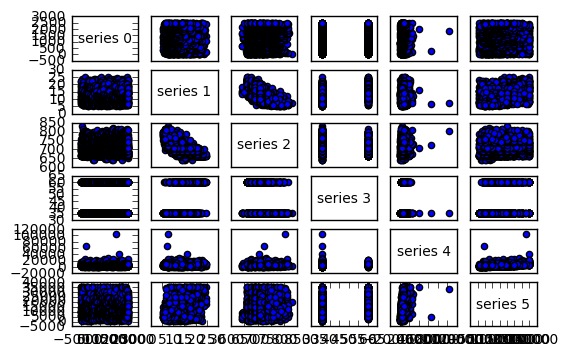

In [8]:
import matplotlib.pyplot as plt


make_scatter(test_data)



72.74159308826222 -0.08453833623501475


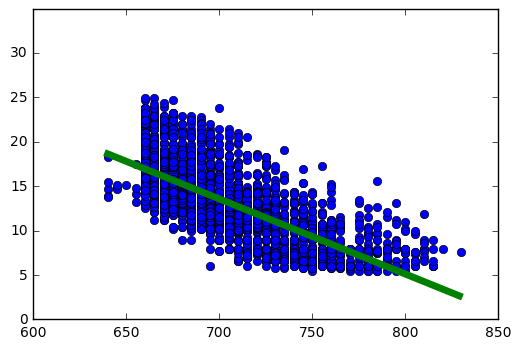

In [9]:
from operator import itemgetter

plot_data = zip(fifo_score, interest_rate)
plot_data = [row for row in plot_data if row[0] != None]
#plot_data = sorted(plot_data, key=itemgetter(0))


plt.plot(get_column(plot_data, 0), get_column(plot_data, 1), "o")
axes = plt.gca()
axes.set_ylim([0, max(get_column(plot_data, 1)) + 10])

alpha, beta = least_squares_fit(get_column(plot_data, 0), get_column(plot_data, 1))
print(alpha, beta)
X = []
Y = []
for x in range(min(get_column(plot_data, 0)), max(get_column(plot_data, 0))):
    X.append(x)
    Y.append(beta * x + alpha)
plt.plot(X, Y, linewidth=5)

plt.show()

In [10]:
def total_sum_of_squares(y):
    return sum(v ** 2 for v in deviations(y))

In [11]:
def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

In [12]:
r_squared(alpha, beta, X, Y)

1.0

In [13]:
r_squared(alpha, beta, get_column(plot_data, 0), get_column(plot_data, 1))

0.5028387347053991

[0.8444218515250481, 0.7579544029403025]
	 min_theta, min_value [0.8444218515250481, 0.7579544029403025] 685520268.2401239
		 theta [nan, nan]
	 alpha 9e-06
		 theta [nan, nan]
	 alpha 8.1e-06
		 theta [nan, nan]
	 alpha 7.2900000000000005e-06
		 theta [nan, nan]
	 alpha 6.561e-06
		 theta [nan, nan]
	 alpha 5.904900000000001e-06
		 theta [nan, nan]
	 alpha 5.314410000000001e-06
		 theta [nan, nan]
	 alpha 4.782969000000001e-06
		 theta [nan, nan]
	 alpha 4.3046721000000005e-06
		 theta [nan, nan]
	 alpha 3.874204890000001e-06
		 theta [nan, nan]
	 alpha 3.4867844010000007e-06
		 theta [nan, nan]
	 alpha 3.1381059609000006e-06
		 theta [nan, nan]
	 alpha 2.8242953648100006e-06
		 theta [nan, nan]
	 alpha 2.5418658283290006e-06
		 theta [nan, nan]
	 alpha 2.2876792454961005e-06
		 theta [nan, nan]
	 alpha 2.0589113209464906e-06
		 theta [nan, nan]
	 alpha 1.8530201888518416e-06
		 theta [nan, nan]
	 alpha 1.6677181699666574e-06
		 theta [nan, nan]
	 alpha 1.5009463529699917e-06
		 theta

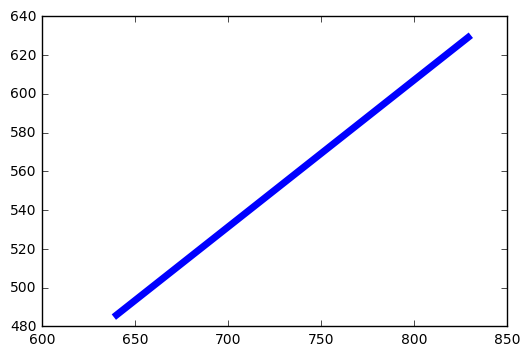

In [14]:
from lib.lin_alg_vectors import *

def squared_error(x_i, y_i , theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2* error(alpha, beta, x_i, y_i),
            -2* error(alpha, beta, x_i, y_i) * x_i]

random.seed(0)
theta = [random.random(), random.random()]
print(theta)
alpha, beta = minimize_stochastic(
    squared_error,
    squared_error_gradient,
    get_column(plot_data, 0),
    get_column(plot_data, 1),
    theta,
    0.00001)

print(alpha, beta)

X = []
Y = []
for x in range(min(get_column(plot_data, 0)), max(get_column(plot_data, 0))):
    X.append(x)
    Y.append(beta * x + alpha)
plt.plot(X, Y, linewidth=5)

plt.show()